# Probability of Default - EDA - Ram Sudheer(UOH)

In [145]:
#1 -- Load data set 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Training Data set link -  https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior
loan_consumer_data = pd.read_csv('Training_Data.csv'); # Loading downloaded data set into loan_consumer_data
pd.pandas.set_option('display.max_columns',None) # To display all the columns present in the data

In [72]:
#2 -- sample records

loan_consumer_data.head()  # Sample records

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [73]:
#3 -- Check data types and Null count details of consumer data
loan_consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [74]:
#4 -- Check if any duplicates present in the data

check_duplicate = loan_consumer_data[loan_consumer_data.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
print(check_duplicate)

Duplicate Rows :
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []


# From #3 and #4 above, there are no missing or duplicate values in the consumer loan dataset

In [75]:
#5 -- Check the unique values. especially for categorical fields
loan_consumer_data.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [76]:
#6 -- House_Ownership has 3 unique values instead of assumed two 
print(loan_consumer_data['House_Ownership'].unique())

['rented' 'norent_noown' 'owned']


In [77]:
#7 -- Dropping column "Id", which is just a running sl.no from the dataset
loan_consumer_data1 = loan_consumer_data.drop(['Id'], axis=1)

In [78]:
#8 -- descriptive statistics of the Loan data set 
loan_consumer_data1.describe().apply(lambda s: s.apply('{0:.2f}'.format))  #Suppressing scientific notation in Numeric variables

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00
mean,4997116.67,49.95,10.08,6.33,12.00,0.12
std,2878311.01,17.06,6.00,3.65,1.40,0.33
min,10310.00,21.00,0.00,0.00,10.00,0.00
25%,2503015.00,35.00,5.00,3.00,11.00,0.00
50%,5000694.50,50.00,10.00,6.00,12.00,0.00
75%,7477502.00,65.00,15.00,9.00,13.00,0.00
max,9999938.00,79.00,20.00,14.00,14.00,1.00


In [79]:
#9 -- Analysing Target Variable(Risk_Flag) stats
datax= loan_consumer_data1["Risk_Flag"].value_counts().sort_index()
datay = pd.DataFrame({
"Risk_Flag": datax.index,
"Frequency": datax.values,
"Percent": ((datax.values/datax.values.sum())*100).round(2),
"Cumulative Frequency": datax.values.cumsum(),
"Cumulative Percent": ((datax.values.cumsum()/datax.values.sum())*100).round(2)
})
print(datay)

   Risk_Flag  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0          0     221004     87.7                221004                87.7
1          1      30996     12.3                252000               100.0


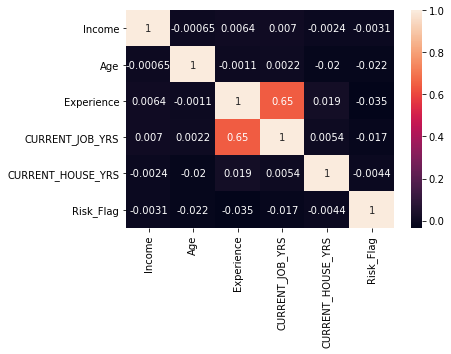

Note - CURRENT_JOB_YRS and Experience have high corelation which of less significance


In [80]:
#10 -- Checking if any corelation variables exist
corelation = loan_consumer_data1.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)
plt.show()
print('Note - CURRENT_JOB_YRS and Experience have high corelation which of less significance')

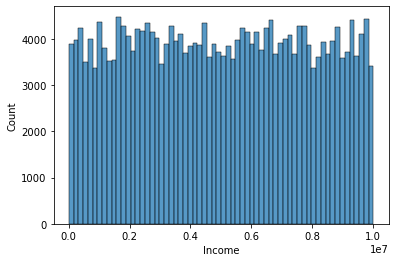

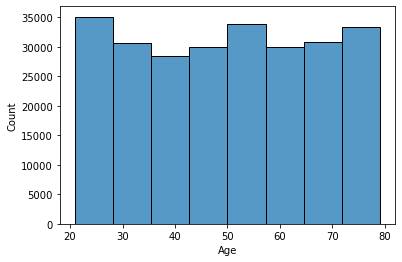

Note - Both Age and Income are uniformly distruibuted


In [81]:
#11 - Analysing Income and Age distribution of data
sns.histplot(loan_consumer_data1['Income'])
plt.show()
sns.histplot(loan_consumer_data1['Age'],bins=8)
plt.show()
print('Note - Both Age and Income are uniformly distruibuted')

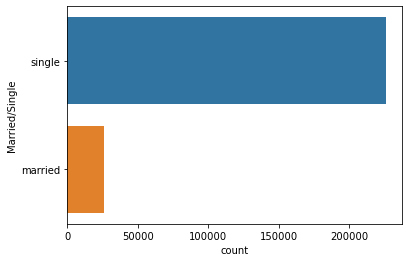

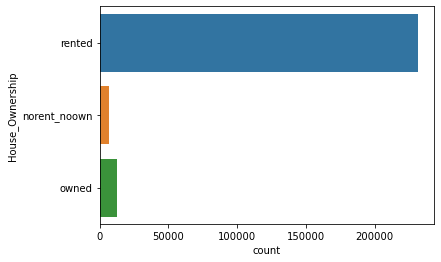

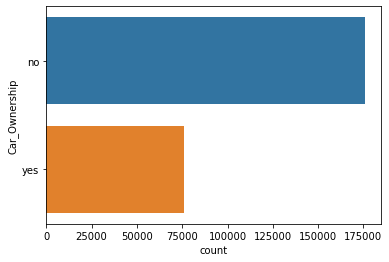

Findings
1. Marital status with single observations way higher than married
2. House Ownership is rented for more than 95% of the observations
3. People who owned the car are less than People who dont have the car


In [82]:
#12 - Plotting categorical variables - univariate analysis
for col in loan_consumer_data1.select_dtypes(include='object'):
    if loan_consumer_data1[col].nunique() <= 10:
        sns.countplot(y=col, data=loan_consumer_data1)
        plt.show()
print('Findings')        
print('1. Marital status with single observations way higher than married')
print('2. House Ownership is rented for more than 95% of the observations')
print('3. People who owned the car are less than People who dont have the car')

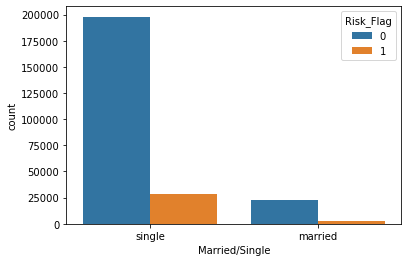

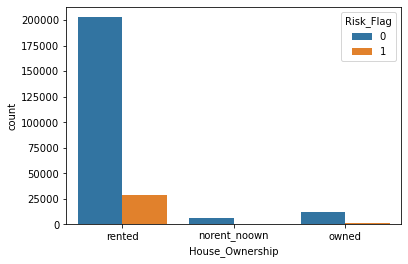

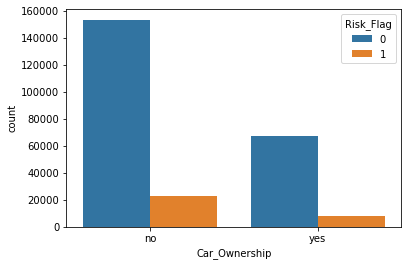

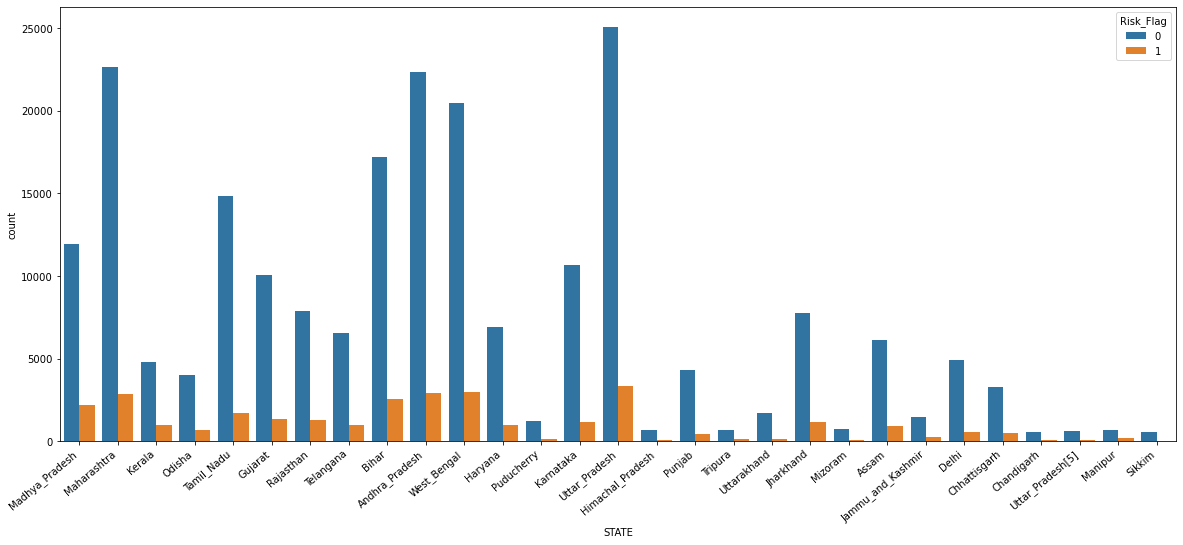

Findings - There are no significant variables determining the Risk Flag status 


In [83]:
#13 - Bi-variate analysis with target variable in context
for col in loan_consumer_data1.select_dtypes(include='object'):
    if loan_consumer_data1[col].nunique() <=10:
        sns.countplot(x=loan_consumer_data1[col],hue="Risk_Flag",data=loan_consumer_data1)
        plt.show()
plt.figure(figsize=(20,8))
ax = sns.countplot(x="STATE", hue="Risk_Flag", data=loan_consumer_data1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

print('Findings - There are no significant variables determining the Risk Flag status ')

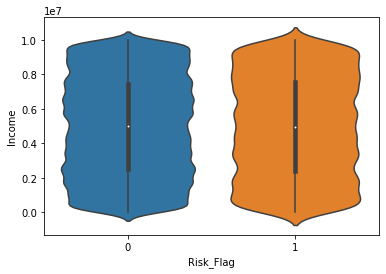

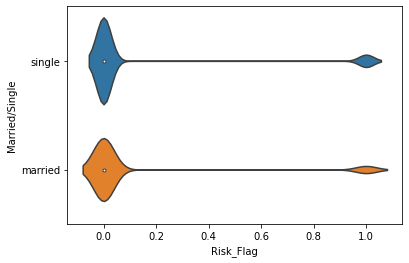

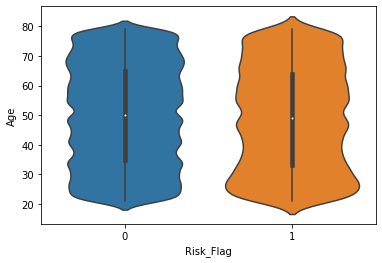

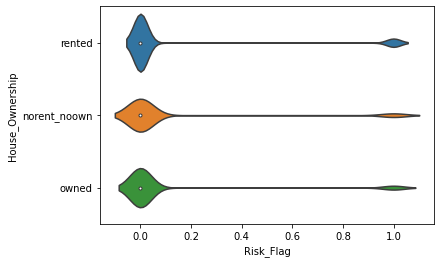

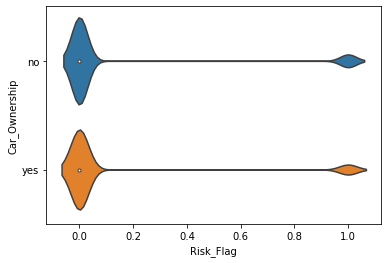

In [84]:
#14 --Further Analysis

sns.violinplot(x='Risk_Flag',y='Income', data=loan_consumer_data1)
plt.show()
sns.violinplot(x='Risk_Flag',y='Married/Single', data=loan_consumer_data1)
plt.show()
sns.violinplot(x='Risk_Flag',y='Age', data=loan_consumer_data1)
plt.show()
sns.violinplot(x='Risk_Flag',y='House_Ownership', data=loan_consumer_data1)
plt.show()

sns.violinplot(x='Risk_Flag',y='Car_Ownership', data=loan_consumer_data1)
plt.show()

In [85]:
loan_consumer_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Data Preparation

In [86]:
loan_consumer_data.value_counts('Risk_Flag')

Risk_Flag
0    221004
1     30996
dtype: int64

In [148]:
loan_consumer_data['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

# Categorise / Grouping Variables

In [87]:
import numpy as np
loan_consumer_data['STATE_TYPE'] = np.where(loan_consumer_data['STATE'].isin(['Manipur', 'Mizoram','Tripura',
                                                                              'Sikkim','Assam','West_Bengal','Odisha','Bihar','Jharkhand'
                                                               ]), 'EAST',loan_consumer_data['STATE'])

In [88]:
import numpy as np
loan_consumer_data['STATE_TYPE'] = np.where(loan_consumer_data['STATE'].isin(['Maharashtra', 'Gujarat','Chhattisgarh',
                                                                              'Madhya_Pradesh'
                                                               ]), 'WEST',loan_consumer_data['STATE_TYPE'])

In [89]:
import numpy as np
loan_consumer_data['STATE_TYPE'] = np.where(loan_consumer_data['STATE'].isin(['Chandigarh', 'Uttar_Pradesh[5]','Uttar_Pradesh',
                                                                              'Jammu_and_Kashmir','Delhi','Punjab','Haryana','Himachal_Pradesh','Rajasthan','Uttarakhand'
                                                               ]), 'NORTH',loan_consumer_data['STATE_TYPE'])

In [90]:
import numpy as np
loan_consumer_data['STATE_TYPE'] = np.where(loan_consumer_data['STATE'].isin(['Andhra_Pradesh', 'Tamil_Nadu','Telangana',
                                                                              'Karnataka','Kerala','Puducherry'
                                                               ]), 'SOUTH',loan_consumer_data['STATE_TYPE'])

In [91]:
loan_consumer_data['STATE'].unique()
loan_consumer_data['STATE_TYPE'].unique()

array(['WEST', 'SOUTH', 'EAST', 'NORTH'], dtype=object)

In [92]:
import numpy as np
loan_consumer_data['PROFESSION_TYPE'] = np.where(loan_consumer_data['Profession'].isin(['Hotel_Manager', 'Flight_attendant','Politician',
                                                                            'Microbiologist','Technician'
                                                               ]), 'OTHER',loan_consumer_data['Profession'])

In [93]:
import numpy as np
loan_consumer_data['PROFESSION_TYPE'] = np.where(loan_consumer_data['Profession'].isin(['Analyst', 'Chartered_Accountant','Consultant',
                                                                            'Economist','Financial_Analyst'
                                                               ]), 'FINANCE',loan_consumer_data['PROFESSION_TYPE'])

In [94]:
import numpy as np
loan_consumer_data['PROFESSION_TYPE'] = np.where(loan_consumer_data['Profession'].isin(['Industrial_Engineer', 'Mechanical_engineer','Chemical_engineer',
                                                                            'Software_Developer','Petroleum_Engineer','Computer_hardware_engineer','Biomedical_Engineer','Technology_specialist','Design_Engineer','Engineer','Civil_engineer','Computer_operator'
                                                               ]), 'ENGINEER',loan_consumer_data['PROFESSION_TYPE'])

In [95]:
import numpy as np
loan_consumer_data['PROFESSION_TYPE'] = np.where(loan_consumer_data['Profession'].isin(['Web_designer', 'Designer','Graphic_Designer',
                                                                            'Architect','Chef','Comedian','Technical_writer','Artist','Fashion_Designer'
                                                               ]), 'ARTS',loan_consumer_data['PROFESSION_TYPE'])

In [96]:
import numpy as np
loan_consumer_data['PROFESSION_TYPE'] = np.where(loan_consumer_data['Profession'].isin(['Civil_servant', 'Official','Army_officer',
                                                                            'Surveyor','Geologist','Librarian','Scientist','Firefighter','Statistician','Drafter','Magistrate','Aviator','Air_traffic_controller','Lawyer','Secretary','Police_officer'
                                                               ]), 'GOVT',loan_consumer_data['PROFESSION_TYPE'])

In [97]:
import numpy as np
loan_consumer_data['PROFESSION_TYPE'] = np.where(loan_consumer_data['Profession'].isin(['Physician', 'Dentist','Surgeon',
                                                                            'Psychologist'
                                                               ]), 'MEDICAL',loan_consumer_data['PROFESSION_TYPE'])

In [98]:
loan_consumer_data['Profession'].unique()
loan_consumer_data['PROFESSION_TYPE'].unique()

array(['ENGINEER', 'ARTS', 'GOVT', 'FINANCE', 'OTHER', 'MEDICAL'],
      dtype=object)

# Converting Continuous variables to Categorical dummies

In [99]:
loan_consumer_data['Age:20-30']=np.where(loan_consumer_data['Age'].isin(range(20,31)),1,0)
loan_consumer_data['Age:30-40']=np.where(loan_consumer_data['Age'].isin(range(30,41)),1,0)
loan_consumer_data['Age:40-50']=np.where(loan_consumer_data['Age'].isin(range(40,51)),1,0)
loan_consumer_data['Age:50-60']=np.where(loan_consumer_data['Age'].isin(range(50,61)),1,0)
loan_consumer_data['Age:60-70']=np.where(loan_consumer_data['Age'].isin(range(60,71)),1,0)
loan_consumer_data['Age:70-80']=np.where(loan_consumer_data['Age'].isin(range(70,81)),1,0)
loan_consumer_data['Age:80-90']=np.where(loan_consumer_data['Age'].isin(range(80,91)),1,0)

In [100]:
loan_consumer_data['Experience:0-5']=np.where(loan_consumer_data['Experience'].isin(range(0,6)),1,0)
loan_consumer_data['Experience:6-10']=np.where(loan_consumer_data['Experience'].isin(range(6,11)),1,0)
loan_consumer_data['Experience:11-15']=np.where(loan_consumer_data['Experience'].isin(range(11,16)),1,0)
loan_consumer_data['Experience:16-20']=np.where(loan_consumer_data['Experience'].isin(range(16,21)),1,0)

In [101]:
loan_consumer_data['Experience:0-5']=np.where(loan_consumer_data['Experience'].isin(range(0,6)),1,0)
loan_consumer_data['Experience:6-10']=np.where(loan_consumer_data['Experience'].isin(range(6,11)),1,0)
loan_consumer_data['Experience:11-15']=np.where(loan_consumer_data['Experience'].isin(range(11,16)),1,0)
loan_consumer_data['Experience:16-20']=np.where(loan_consumer_data['Experience'].isin(range(16,21)),1,0)

In [102]:
loan_consumer_data['Income:0-5L']=np.where(loan_consumer_data['Income'].isin(range(0,500001)),1,0)
loan_consumer_data['Income:5-5L']=np.where(loan_consumer_data['Income'].isin(range(500000,1000001)),1,0)
loan_consumer_data['Income:10-15L']=np.where(loan_consumer_data['Income'].isin(range(1000000,1500001)),1,0)
loan_consumer_data['Income:15-20L']=np.where(loan_consumer_data['Income'].isin(range(1500000,2000001)),1,0)
loan_consumer_data['Income:20-25L']=np.where(loan_consumer_data['Income'].isin(range(2000000,2500001)),1,0)
loan_consumer_data['Income:25-30L']=np.where(loan_consumer_data['Income'].isin(range(2500000,3000001)),1,0)
loan_consumer_data['Income:30-35L']=np.where(loan_consumer_data['Income'].isin(range(3000000,3500001)),1,0)
loan_consumer_data['Income:35-40L']=np.where(loan_consumer_data['Income'].isin(range(3500000,4000001)),1,0)
loan_consumer_data['Income:40-45L']=np.where(loan_consumer_data['Income'].isin(range(4000000,4500001)),1,0)
loan_consumer_data['Income:45-50L']=np.where(loan_consumer_data['Income'].isin(range(4500000,5000001)),1,0)
loan_consumer_data['Income:50-55L']=np.where(loan_consumer_data['Income'].isin(range(5000000,5500001)),1,0)
loan_consumer_data['Income:55-60L']=np.where(loan_consumer_data['Income'].isin(range(5500000,6000001)),1,0)
loan_consumer_data['Income:60-65L']=np.where(loan_consumer_data['Income'].isin(range(6000000,6500001)),1,0)
loan_consumer_data['Income:65-70L']=np.where(loan_consumer_data['Income'].isin(range(6500000,7000001)),1,0)
loan_consumer_data['Income:70-75L']=np.where(loan_consumer_data['Income'].isin(range(7000000,7500001)),1,0)
loan_consumer_data['Income:75-80L']=np.where(loan_consumer_data['Income'].isin(range(7500000,8000001)),1,0)
loan_consumer_data['Income:80-85L']=np.where(loan_consumer_data['Income'].isin(range(8000000,8500001)),1,0)
loan_consumer_data['Income:85-90L']=np.where(loan_consumer_data['Income'].isin(range(8500000,9000001)),1,0)
loan_consumer_data['Income:90-95L']=np.where(loan_consumer_data['Income'].isin(range(9000000,9500001)),1,0)
loan_consumer_data['Income:95-100L']=np.where(loan_consumer_data['Income'].isin(range(9500000,10000001)),1,0)
loan_consumer_data['Income:100-200']=np.where(loan_consumer_data['Income'].isin(range(10000000,20000000)),1,0)

In [103]:
loan_consumer_data['CURRENT_JOB_YRS:0-5']=np.where(loan_consumer_data['CURRENT_JOB_YRS'].isin(range(0,6)),1,0)
loan_consumer_data['CURRENT_JOB_YRS:5-10']=np.where(loan_consumer_data['CURRENT_JOB_YRS'].isin(range(6,11)),1,0)
loan_consumer_data['CURRENT_JOB_YRS:10-15']=np.where(loan_consumer_data['CURRENT_JOB_YRS'].isin(range(11,16)),1,0)

# Retaining only categorical variables

In [104]:
loan_consumer_model_data = loan_consumer_data.drop(['Id','Income','Age','Experience','Profession','CITY','STATE','CURRENT_JOB_YRS'],axis=1)

# Creating dummies for categorical(object) variables

In [105]:
# Create two data sets for numeric and non-numeric data
data_num = loan_consumer_model_data.select_dtypes(exclude=['object'])
data_str = loan_consumer_model_data.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
data_str_onehot = pd.get_dummies(data_str)

# Union the one-hot encoded columns to the numeric ones
loan_data_model_final = pd.concat([data_num, data_str_onehot], axis=1)

# Print the columns in the new data set
print(loan_data_model_final.columns)

Index(['CURRENT_HOUSE_YRS', 'Risk_Flag', 'Age:20-30', 'Age:30-40', 'Age:40-50',
       'Age:50-60', 'Age:60-70', 'Age:70-80', 'Age:80-90', 'Experience:0-5',
       'Experience:6-10', 'Experience:11-15', 'Experience:16-20',
       'Income:0-5L', 'Income:5-5L', 'Income:10-15L', 'Income:15-20L',
       'Income:20-25L', 'Income:25-30L', 'Income:30-35L', 'Income:35-40L',
       'Income:40-45L', 'Income:45-50L', 'Income:50-55L', 'Income:55-60L',
       'Income:60-65L', 'Income:65-70L', 'Income:70-75L', 'Income:75-80L',
       'Income:80-85L', 'Income:85-90L', 'Income:90-95L', 'Income:95-100L',
       'Income:100-200', 'CURRENT_JOB_YRS:0-5', 'CURRENT_JOB_YRS:5-10',
       'CURRENT_JOB_YRS:10-15', 'Married/Single_married',
       'Married/Single_single', 'House_Ownership_norent_noown',
       'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_no',
       'Car_Ownership_yes', 'STATE_TYPE_EAST', 'STATE_TYPE_NORTH',
       'STATE_TYPE_SOUTH', 'STATE_TYPE_WEST', 'PROFESSION_TYPE_ART

# Now with all(only) dummies data prepared, Model Building can be started

# Model Building - Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Create the X and y data sets
X = loan_data_model_final.drop(['Risk_Flag'],axis=1)
y = loan_data_model_final[['Risk_Flag']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(max_iter=1000).fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

print(preds)

[[-0.00692726  0.1022801  -0.09877079 -0.10907907 -0.05633311 -0.13920293
  -0.11465514  0.          0.0722571  -0.22476744 -0.1713591  -0.29852368
   0.10309755  0.10341366 -0.08015297  0.07671239 -0.12042138 -0.24309439
  -0.03390473 -0.06593411  0.01444296  0.01118221 -0.08249366 -0.02442422
  -0.13345469 -0.09025795 -0.03156422 -0.03276491  0.07259921 -0.0570897
   0.09584766 -0.10413186  0.         -0.29104728 -0.21798069 -0.11336515
  -0.41355277 -0.20884035 -0.27475991 -0.35395083  0.0063176  -0.23203455
  -0.39035858 -0.07409907 -0.2076912  -0.22811627 -0.11248659 -0.12427683
  -0.17088287 -0.12352062 -0.00164548 -0.12790171 -0.07416563]]
[[0.8413693  0.1586307 ]
 [0.84019607 0.15980393]
 [0.90637397 0.09362603]
 ...
 [0.87788471 0.12211529]
 [0.87691309 0.12308691]
 [0.86986382 0.13013618]]


In [107]:
clf_logistic.score(X_test,y_test)

0.8780820105820106

In [108]:
# Create a dataframe for the probabilities of default
from sklearn.metrics import classification_report
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['Risk_Flag'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.15 else 0)

# Print the row counts for each loan status
print(preds_df['Risk_Flag'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['Risk_Flag'], target_names=target_names))

0    64150
1    11450
Name: Risk_Flag, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.89      0.86      0.87     66383
     Default       0.17      0.21      0.18      9217

    accuracy                           0.78     75600
   macro avg       0.53      0.53      0.53     75600
weighted avg       0.80      0.78      0.79     75600



# Due to huge imbalance of the data in the ratio 1:6 (Non-default:Default), the model prediction is inaccurate

# To Balance the data, we have the below approaches

#  1. Gather more data - Which will increase the number of defaults, but percentage of defaults may not change
#  2. Under sample the Non-default data to create balanced data

# Here, we adopt/follow the Undersampling method to create balanced data

In [109]:
count_nondefault, count_default = loan_data_model_final['Risk_Flag'].value_counts()

nondefaults = loan_data_model_final[loan_data_model_final['Risk_Flag'] == 0]
defaults = loan_data_model_final[loan_data_model_final['Risk_Flag'] == 1]
nondefaults_under = nondefaults.sample(count_default)
loan_data_model_final_under = pd.concat([nondefaults_under.reset_index(drop = True), defaults.reset_index(drop=True)], axis=0)

In [110]:
loan_data_model_final_under['Risk_Flag'].value_counts()

1    30996
0    30996
Name: Risk_Flag, dtype: int64

# With the balanced data, we once again train the model using Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Create the X and y data sets
X = loan_data_model_final_under.drop(['Risk_Flag'],axis=1)
y = loan_data_model_final_under[['Risk_Flag']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs',max_iter=4000).fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

[[-0.0100112   0.14324721 -0.10318371 -0.12758054 -0.08237907 -0.13460717
  -0.10352384  0.          0.23414902 -0.06976797 -0.06054724 -0.12751079
   0.14045505  0.13822943 -0.06930068  0.05882733 -0.09328516 -0.18497111
   0.03879976 -0.05379676  0.08082097 -0.01103052 -0.01945601  0.04348882
  -0.17695044 -0.0800984  -0.00683306  0.04209422  0.05666316 -0.01880818
   0.14650726 -0.05503269  0.         -0.12406928  0.0020572   0.0983351
  -0.1225706   0.09889362 -0.04444545 -0.14441951  0.16518798  0.06850722
  -0.0921842   0.06739681 -0.01730767 -0.10046796  0.02670183 -0.04024821
  -0.06903081 -0.02827395  0.10075307 -0.03006413  0.04318705]]
   Risk_Flag  prob_default
0          1      0.441332
1          0      0.590120
2          0      0.394059
3          1      0.558619
4          1      0.537715


In [43]:
# Create a dataframe for the probabilities of default
from sklearn.metrics import classification_report
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['Risk_Flag'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['Risk_Flag'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['Risk_Flag'], target_names=target_names))

1    9519
0    9079
Name: Risk_Flag, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.55      0.54      0.54      9290
     Default       0.55      0.56      0.55      9308

    accuracy                           0.55     18598
   macro avg       0.55      0.55      0.55     18598
weighted avg       0.55      0.55      0.55     18598



# Even with the balanced data, model performance though improved from previous run, is not significant

# Since the Undersampling has not improved model performace, lets try Upsampling the data using SMOTEENN( which uses KNN =3)

In [ ]:
from imblearn.combine import SMOTEENN
X = loan_data_model_final.drop(['Risk_Flag'],axis=1)
y = loan_data_model_final[['Risk_Flag']]
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X,y)

# SMOTEENN is taking long hours to complete.

# Model Building - Using XGBoost Decision Trees

In [112]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Create the X and y data sets
X = loan_data_model_final.drop(['Risk_Flag'],axis=1)
y = loan_data_model_final[['Risk_Flag']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

# Create and fit the logistic regression model
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))


# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

E:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Risk_Flag  prob_default
0          1      0.261705
1          1      0.440264
2          0      0.039093
3          0      0.061947
4          0      0.063967


In [113]:
# Create a dataframe for the probabilities of default
from sklearn.metrics import classification_report
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['Risk_Flag'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.25 else 0)

# Print the row counts for each loan status
print(preds_df['Risk_Flag'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['Risk_Flag'], target_names=target_names))

0    65494
1    10106
Name: Risk_Flag, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.94      0.93      0.93     66383
     Default       0.52      0.57      0.54      9217

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.89     75600



# Though the XGBoost performance is better than Logistic Regression, due to imbalance of data, Model performance in Default - precision and recall is poor.

# Creating balanced data using under sampling

In [114]:
count_nondefault, count_default = loan_data_model_final['Risk_Flag'].value_counts()
#print(count_nondefault,count_default)  221004 30996
nondefaults = loan_data_model_final[loan_data_model_final['Risk_Flag'] ==0]
defaults = loan_data_model_final[loan_data_model_final['Risk_Flag'] ==1]
nondefaults_under = nondefaults.sample(count_default)
loan_data_model_final_under = pd.concat([nondefaults_under.reset_index(drop = True), defaults.reset_index(drop=True)], axis=0)
print(loan_data_model_final_under['Risk_Flag'].value_counts())

1    30996
0    30996
Name: Risk_Flag, dtype: int64


# Now with the balanced data, running XGBoost once again

In [115]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Create the X and y data sets
X = loan_data_model_final_under.drop(['Risk_Flag'],axis=1)
y = loan_data_model_final_under[['Risk_Flag']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

# Create and fit the logistic regression model
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))


# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

E:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Risk_Flag  prob_default
0          1      0.700950
1          0      0.438669
2          0      0.714333
3          1      0.812533
4          1      0.564731


In [116]:
# Create a dataframe for the probabilities of default
from sklearn.metrics import classification_report
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['Risk_Flag'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['Risk_Flag'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['Risk_Flag'], target_names=target_names))

1    9761
0    8837
Name: Risk_Flag, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.77      0.79      9290
     Default       0.78      0.82      0.80      9308

    accuracy                           0.79     18598
   macro avg       0.79      0.79      0.79     18598
weighted avg       0.79      0.79      0.79     18598



# Balanced data improved XGBoost model peformance with F1-Score reaching 79%.

0.8508598689137623


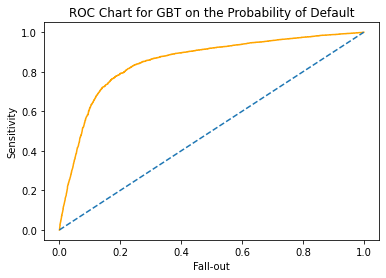

In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_preds[:,1])
plt.plot(fallout_gbt, sensitivity_gbt, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
auc = roc_auc_score(y_test, gbt_preds[:,1])

#print AUC score
print(auc)

# Hyper Parameter Tuning - XGBoost

In [118]:
y['Risk_Flag'].value_counts()

1    30996
0    30996
Name: Risk_Flag, dtype: int64

In [119]:
## Hyper Parameter Optimization - XGBoost

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [120]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [121]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken is: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [122]:
classifier=xgboost.XGBClassifier()

In [123]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [124]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished
E:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 3 minutes and 8.51 seconds.


In [125]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [126]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [183]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Create the X and y data sets
X = loan_data_model_final_under.drop(['Risk_Flag'],axis=1)
y = loan_data_model_final_under[['Risk_Flag']]

# Use test_train_split to create the training and test sets
X_train_s, X_test_s, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

X_train = X_train_s.values
X_test = X_test_s.values

# Create and fit the logistic regression model
clf_gbt = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None).fit(X_train, np.ravel(y_train))


# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)



[21:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [128]:
# Create a dataframe for the probabilities of default
from sklearn.metrics import classification_report
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['Risk_Flag'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['Risk_Flag'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['Risk_Flag'], target_names=target_names))

0    9507
1    9091
Name: Risk_Flag, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.83      0.85      0.84      9290
     Default       0.85      0.83      0.84      9308

    accuracy                           0.84     18598
   macro avg       0.84      0.84      0.84     18598
weighted avg       0.84      0.84      0.84     18598



0.8982235208159192


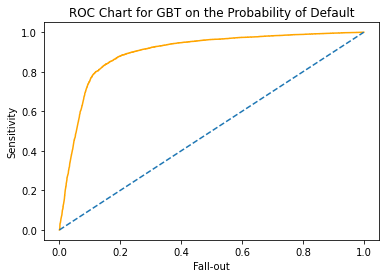

In [129]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_preds[:,1])
plt.plot(fallout_gbt, sensitivity_gbt, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
auc = roc_auc_score(y_test, gbt_preds[:,1])

#print AUC score
print(auc)

# Model Deployment

In [215]:
import pickle
# open a file, where you want to store the data
file = open('C:\\Users\\Ram Sudheer\\Prob_of_default\\pred_default_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(clf_gbt, file)

In [217]:
model = open('C:\\Users\\Ram Sudheer\\Prob_of_default\\pred_default_xgb.pkl','rb')
predict_default = pickle.load(model)